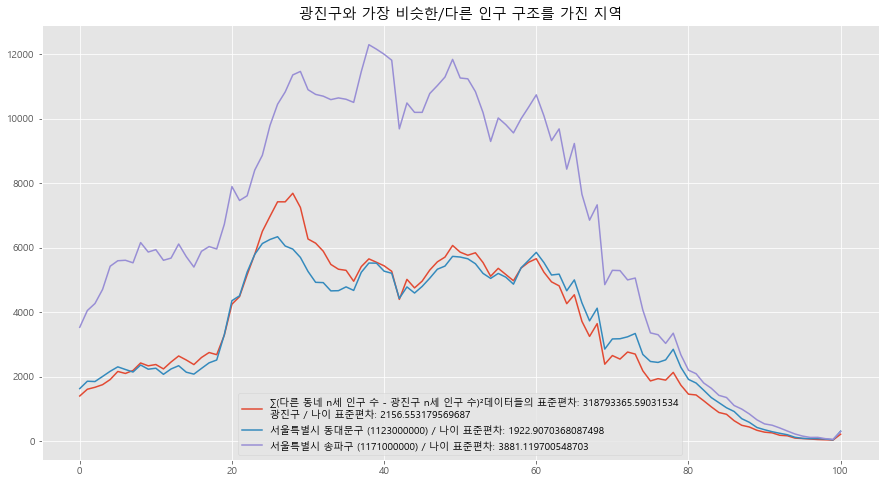

In [18]:
# 실습 1: 인구 구조
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('202012_population_status_by_age_in_Seoul.csv', index_col=0)
total = df.iloc[1:,2:]
[row, col] = total.shape

main = 0
age = np.linspace(0,100,101)
main_number = np.zeros(101)
min_number = np.zeros(101)
max_number = np.zeros(101)
main_label = '광진구'

for i in range(row):
    if main_label in total.index[i]:
        main = total.iloc[i,:]
        for j in range(101):
            main_number[j] = int(total.iloc[i,j].replace(',',''))

        total = total.drop(total.index[i])
        break;

data = np.zeros(row-1)

for i in range(row-1):
    for j in range(101):
        data[i] += ( int(main[j].replace(',','')) - int(total.iloc[i, j].replace(',','')) )**2

min_index = np.where(data == min(data))[0][0]
max_index = np.where(data == max(data))[0][0]

min_label = total.index[min_index]
max_label = total.index[max_index]
for i in range(101):
    min_number[i] = int(total.iloc[min_index,i].replace(',',''))
    max_number[i] = int(total.iloc[max_index,i].replace(',',''))

plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 8))
plt.title('광진구와 가장 비슷한/다른 인구 구조를 가진 지역')
plt.plot(age, main_number, label=('∑(다른 동네 n세 인구 수 - 광진구 n세 인구 수)²데이터들의 표준편차: ') +  str(np.std(data)) + '\n' + main_label + ' / 나이 표준편차: ' + str(np.std(main_number)))
plt.plot(age, min_number, label=(min_label + ' / 나이 표준편차: ' + str(np.std(min_number))) )
plt.plot(age, max_number, label=(max_label + ' / 나이 표준편차: ' + str(np.std(max_number))) )
plt.legend()
plt.show()
